In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from wordcloud import WordCloud

from mpl_toolkits.mplot3d import Axes3D

In [2]:
author_data=pd.read_csv("author_data_clusters.csv")
author_data.index=author_data.id
author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
author_data.sample(20)

,gender,age,topic,sign,grupo_edad,Freq
id,,,,,,
3362084,female,23,Education,Aries,B,24
3355012,female,17,indUnk,Capricorn,A,6
1759489,male,25,Technology,Cancer,B,5
4112864,male,13,Student,Libra,A,8
4137245,male,15,Student,Aries,A,5
3750214,male,17,indUnk,Libra,A,4
3936510,male,17,Student,Scorpio,A,9
3488810,male,25,indUnk,Capricorn,B,9
2202738,female,25,Engineering,Taurus,B,32


In [3]:
tfidf_data=pd.read_csv("usr_txt_ftr_3.csv",header=0,index_col="id")#_2# This dataframe is already normalized to max val
# tfidf_data.index=author_data.id
# # author_data=author_data[["gender","age","topic","sign","grupo_edad","Freq"]]
tfidf_data.sample(20)

,00,000,10,100,11,12,13,14,15,16,...,ya,yay,yea,yeah,year,years,yes,yesterday,york,young
id,,,,,,,,,,,,,,,,,,,,,
3484617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003501,0.00000,...,0.000000,0.007597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3820833,0.000000,0.000000,0.000000,0.003144,0.003035,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.004792,0.000000,0.000000,0.0,0.000000
3749504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00485,...,0.000000,0.000000,0.005061,0.000000,0.000000,0.003195,0.003418,0.000000,0.0,0.000000
3804184,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1304379,0.000000,0.000000,0.011597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.003380,0.000000,0.009533,0.000000,0.006823,0.000000,0.005242,0.000000,0.0,0.005251
1343387,0.000000,0.000000,0.005734,0.000000,0.001487,0.001509,0.000000,0.000000,0.002705,0.00000,...,0.000000,0.009000,0.000000,0.001724,0.000000,0.010121,0.000000,0.003504,0.0,0.011943
4116431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1993332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.004815,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3349029,0.004012,0.000000,0.001940,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000856,0.002987,0.002732,0.002539,0.0,0.000000


In [4]:
author_data=author_data.loc[tfidf_data.index,:]# select sample tfidf matrix /// Cuando la matriz viene de una muestra

In [5]:
words_index=np.array(['great', 'though', 'school', 'ever', 'better', 'myself', 'another',
             'let', 'year', 'many', 'since', 'world', 'friends', 'maybe',
             'next', 'thought', 'look', 'few', 'man', 'through', 'bad', 'fun',
             'god', 'someone', 'week', 'actually', 'find', 'im', 'lot', 'sure',
       'days', 'pretty', 'best', 'getting', 'away', 'every', 'years',
       'house', 'may', 'tell', 'came', 'nothing', 'same', 'old',
       'anything', 'read', 'blog', 'stuff', 'doing', 'guess', 'everyone',
       'put', 'place', 'own', 'nice', 'left', 'end', 'friend', 'told',
       'happy', 'big', 'everything', 'does', 'person', 'anyway', 'yeah',
       'give', 'such', 'hope', 'guy', 'until', 'mean', 'ok', 'morning',
       'done', 'enough', 'yes', 'talk', 'call', 'having', 'yet', 'found',
       'times', 'might', 'whole', 'keep', 'started', 'called', 'bit',
       'wanted', 'part', 'movie', 'hard', 'try', 'took', 'once',
       'probably', 'least', 'else', 'post', 'later', 'doesn', 'trying',
       'show', 'cool', 'looking', 'start', '10', 'name', 'help',
       'without', 'kind', 'head', 'must', 'dont', 'mind', 'won',
       'tomorrow', 'course', 'quite', 'both', 'mom', 'each', 'remember',
       'saw', 'lol', 'anyone', 'job', 'use', 'makes', 'play', 'believe',
       'family', 'room', 'finally', 'hours', 'girl', 'already', 'car',
       'yesterday', 'gonna', 'point', 'used', 'live', 'thinking', 'three',
       'hate', 'real', 'weekend', 'game', 'music', 'wasn', 'feeling',
       'says', 'money', 'almost', 'sleep', 'talking', 'far', 'book',
       'guys', 'funny', 'fact', 'decided', 'write', 'care', 'class',
       'seems', 'different', 'stop', 'tonight', 'high', 'together',
       'watch', 'hell', 'able', 'working', 'shit', 'soon', 'felt',
       'asked', 'past', 'leave', 'change', 'face', 'wrong', 'isn',
       'sometimes', 'wait', 'heart', 'making', 'song', 'ask', 'reason',
       'coming', 'story', 'com', 'free', 'haven', 'half', 'reading',
       'cause', 'haha', 'dad', 'wish', 'damn', '30', 'pm', 'bed', 'seen',
       'news', 'ago', 'words', 'during', 'idea', 'between', 'minutes',
       'side', 'phone', 'stupid', 'miss', 'couple', 'lost', 'eyes', 'run',
       'kids', 'party', 'food', 'interesting', 'second', 'hey', 'either',
       'however', 'hour', 'okay', 'knew', 'tired', 'comes', 'sorry',
       'happened', 'hand', 'saying', 'set', 'couldn', 'hear', 'full',
       'goes', 'summer', 'late', 'gone', 'rather', '11', 'eat', 'rest',
       'true', 'please', 'weeks', 'friday', 'others', 'less', 'heard',
       'word', 'watching', 'computer', 'small', 'hair', 'hot',
       'understand', 'under', 'gave', 'along', 'kinda', 'instead',
       'taking', 'fucking', 'playing', 'stay', 'thats', 'looks',
       'parents', 'ass', 'means', 'early', 'against', 'whatever', 'white',
       'looked', 'buy', 'check', 'open', 'writing', 'matter', 'dinner',
       'tried', 'bush', 'site', 'close', 'moment', 'problem', 'wouldn',
       'sad', 'turn', 'top', 'saturday', 'seem', 'water', 'girls',
       'months', 'ya', 'war', 'group', 'gets', 'men', 'walk', 'city',
       'front', 'fuck', 'alone', 'met', 'spent', 'black', 'become', 'boy',
       '12', 'crazy', 'baby', 'happen', 'played', 'move', 'wonder', 'tv',
       'outside', 'knows', 'sunday', 'thanks', 'short', 'living', 'woman',
       'church', 'although', 'line', 'watched', 'number', 'hit',
       'american', 'birthday', 'break', 'thank', 'mother', 'case',
       'weird', '20', 'state', 'behind', 'month', 'inside', 'country',
       'especially', 'women', 'favorite', 'talked', 'anymore', 'lunch',
       'wanna', 'ready', 'sitting', 'self', 'drive', 'door', 'john',
       'wants', 'body', 'office', 'meet', 'list', 'question', 'mr', 'etc',
       'sense', 'turned', 'waiting', 'running', 'cant', 'beautiful',
       'band', 'brother', 'mine', 'often', 'sick', 'la', 'bought',
       'light', 'cuz', 'red', 'sex', 'sit', 'awesome', 'fall', 'pay',
       '15', 'four', 'supposed', 'children', 'sort', 'usually', 'ones',
       'team', 'trip', 'important', 'picture', 'fine', 'anyways',
       'totally', 'deal', 'bring', 'except', 'lots', 'brought', 'test',
       'seeing', 'pain', 'taken', 'monday', 'email', 'yourself', 'spend',
       'sister', 'dream', 'given', 'enjoy', 'pictures', 'cannot', 'lives',
       'type', 'hurt', 'easy', 'sound', 'order', 'college', '2004',
       'town', 'didnt', 'needed', 'books', 'power', 'company', 'online',
       'kept', 'young', 'pick', 'worth', 'five', 'hold', 'de', 'die',
       'completely', 'needs', 'experience', 'sat', 'perhaps', 'movies',
       'using', 'wow', 'death', 'future', 'till', 'chance', 'walked',
       'ended', 'hands', 'middle', 'plan', 'cut', 'woke', 'stand',
       'learn', 'cold', 'note', 'longer', 'across', 'air', 'huge',
       'amazing', 'internet', 'hopefully', 'whether', 'president',
       'thoughts', 'sweet', 'father', 'perfect', 'figure', 'busy', 'film',
       'cute', 'special', 'paper', 'crap', 'problems', 'english', 'bored',
       'dead', 'excited', 'http', 'street', 'forget', 'drink', 'possible',
       'loved', 'listening', 'starting', 'answer', 'several', 'history',
       'finished', 'gay', 'boring', 'road', 'blue', 'page', 'store',
       'www', 'telling', 'walking', 'games', 'apparently', 'wonderful',
       'exactly', 'single', 'realize', 'known', 'system', 'relationship',
       'rock', 'forward', 'law', 'iraq', 'business', 'kid', 'listen',
       'human', 'ha', 'plus', 'fast', 'questions', 'public', 'child',
       'america', 'afternoon', 'due', 'support', 'sounds', 'worked',
       'seriously', 'wrote', 'songs', 'evening', 'age', 'entire', 'dog',
       'gotta', 'date', 'information', 'works', 'den', 'takes', 'himself',
       'visit', 'leaving', 'eating', 'seemed', 'voice', 'sun', 'aren',
       'cd', 'kill', 'happens', 'upon', 'moving', 'mood', 'government',
       'near', 'bar', 'kerry', 'control', 'changed', 'certain', 'ate',
       'current', 'simply', 'mail', 'share', 'dark', 'giving', 'link',
       'yay', 'bus', 'smile', 'driving', 'hehe', 'laugh', 'level',
       'comments', 'within', 'realized', 'personal', '50', 'glad', 'boys',
       'sent', 'service', 'send', 'mad', 'forever', 'written', 'peace',
       'lately', 'truth', 'fight', 'poor', 'meeting', 'dance', 'simple',
       'win', 'definitely', 'study', 'straight', 'cry', 'somewhere',
       'piece', 'article', 'worse', 'add', 'jesus', 'ran', 'teacher',
       'hang', 'message', 'wear', 'green', 'hmm', 'finish', 'sigh',
       'dunno', 'web', 'themselves', 'act', 'space', 'area', 'shall',
       'attention', 'normal', 'fear', 'states', 'pass', 'park', 'strong',
       'situation', 'basically', 'deep', 'recently', 'rain', 'evil',
       'sign', 'ride', 'feels', 'floor', 'eye', 'thursday', 'liked', '00',
       'form', 'learned', 'wake', 'above', 'wife', 'ways', 'usual',
       'random', 'sucks', 'large', 'fire', 'comment', 'feet', 'coffee',
       'art', 'na', 'moved', 'clean', 'speak', 'lose', 'non', 'video',
       'lord', 'strange', 'project', 'catch', 'imagine', 'clothes',
       'feelings', 'website', 'low', 'shopping', 'stopped', 'ah', 'final',
       'conversation', 'somehow', 'major', 'worry', 'table', 'fat',
       'alot', 'choice', 'married', 'picked', 'following', 'july', 'none',
       'missed', 'truly', 'minute', 'serious', 'wearing', 'students',
       'caught', 'bunch', 'complete', 'mention', 'fell', 'blah', 'return',
       'tuesday', 'meant', 'bill', 'based', '000', 'posted', 'christmas',
       'six', 'dreams', 'soul', 'example', 'asking', 'ice', 'clear',
       'suppose', 'worst', 'save', 'itself', 'earlier', 'chris', 'card',
       'step', 'shows', 'wednesday', 'ill', 'issue', 'dun', 'gotten',
       'unless', '100', 'box', 'son', 'view', 'shot', 'blood', 'trust',
       'super', 'afraid', 'weather', 'ppl', 'places', 'towards',
       'beginning', 'continue', 'political', 'general', 'died', 'dear',
       'club', 'mostly', 'update', 'earth', 'yea', 'local', 'lady',
       'bitch', 'third', 'knowing', 'stories', 'speaking', 'national',
       'building', 'beat', 'shirt', 'hello', 'passed', 'including',
       'reality', 'touch', 'season', 'began', 'noticed', 'forgot',
       'beach', '25', 'calls', 'expect', 'window', 'sleeping', 'scared',
       'calling', 'present', 'quickly', 'absolutely', 'apartment',
       'pissed', 'al', 'drunk', 'social', 'wedding', 'star', 'beer', '16',
       'stuck', 'york', 'color', '14', 'round', 'process', 'issues',
       'ten', 'turns', 'brain', 'thinks', 'ur', 'practice', 'program',
       'main', 'style', '40', 'likely', 'action', 'interested', '13',
       'radio', 'lead', 'eventually', 'husband', 'total', 'reasons',
       'weight', 'boyfriend', 'million', 'starts', 'begin', '24', 'paul',
       'character', 'angry', 'managed', 'lucky', 'drinking', 'explain',
       'cat', 'camp', 'hoping', 'broke', 'mouth', 'train', 'currently',
       'everybody', 'broken', 'girlfriend', 'standing', 'stayed', '18',
       'record', 'asleep', 'french', 'mike', 'king', 'ideas', 'period',
       'paid', 'report', 'hi', 'united', 'plans', 'luck', 'faith', 'bye',
       'grade', 'gives', 'david', 'follow', 'headed', 'mark', 'suddenly',
       'nearly', 'slow', 'shoes', 'coz', 'onto', 'choose', 'shouldn',
       'media', 'ground', 'difficult', 'da', 'fit', 'extra', 'alright',
       'trouble', 'subject', 'quick', 'doubt', 'points', 'loves', '2003',
       'entry', 'pool', 'lack', 'cos', 'became', 'michael', 'notice',
       'chicken', 'obviously', 'title', 'putting', 'tears', 'lets',
       'according', 'ive', 'shower', 'ball', 'despite', 'fair', 'june',
       'lazy', 'classes', 'slept', 'daily', 'net', 'hanging', 'certainly',
       'amount', 'energy', 'born', 'folks', 'series', 'named', 'christ',
       'proud', 'shop', 'security', 'decide', 'nobody', 'missing',
       'letter', 'center', 'chinese', 'version', 'names', 'suck',
       'involved', 'marriage', 'album', 'george', 'search', 'filled',
       'blogger', 'wall', 'held', 'student', 'fan', 'likes', 'arms',
       'wondering', 'finding', 'stage', 'eh', 'drove', 'exciting',
       'camera', 'health', 'meaning', 'language', 'sa', 'throw', 'older',
       'society', 'crying', 'admit', 'consider', 'everyday', 'breakfast',
       'bag'])

In [6]:
tfidf_data=tfidf_data.loc[:,tfidf_data.columns.isin(words_index[:500])]

In [7]:
# author_data.Freq=author_data.Freq/author_data.Freq.max() # Normalizar frecuencia de publicaciones

In [8]:
# enco_cath=pd.get_dummies(author_data[["gender","grupo_edad"]]).astype("float64")

In [9]:
# enco_cath=enco_cath.loc[:,["gender_female","grupo_edad_A","grupo_edad_B","grupo_edad_C"]]

In [10]:
# author_data_norm=enco_cath.join(author_data.Freq)
# author_data_norm=author_data_norm.join(tfidf_data)

In [11]:
# author_data_norm.sample(20)

In [14]:
# 3d Embedding for visualization
spect_emb_3=manifold.SpectralEmbedding(n_components=3, n_jobs=-1).fit_transform(tfidf_data)#author_data_norm)#

# Clustering

In [12]:
# auth_ward_full=hierarchy.linkage(author_data_norm, 'ward')#tfidf_data

In [13]:
# plt.figure(figsize=(15,35))
# dn_tf_full = hierarchy.dendrogram(auth_ward_full,orientation="left")
# plt.title('Ward Link Dendrogram')
# plt.show()

In [ ]:
auth_ward_3=hierarchy.linkage(spect_emb_3, 'ward')

In [ ]:
plt.figure(figsize=(15,35))
dn_tf_3=hierarchy.dendrogram(auth_ward_3,orientation="left")
plt.title('Ward Link Dendrogram from 3d spectral embedding')
plt.show()

In [15]:
clustering_3d_ward = AgglomerativeClustering(linkage='ward', n_clusters=10)
clustering_3d_ward.fit(spect_emb_3)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func=<function mean at 0x0000013E13E93C80>)

In [16]:
pd.crosstab(index=clustering_3d_ward.labels_, columns="count")

col_0,count
row_0,
0,2704
1,287
2,921
3,660
4,939
5,1009
6,415
7,524
8,3943


Text(0.5, 1.0, '2d spectral coordinates from 3d spectral hierarchical (ward) clustering')

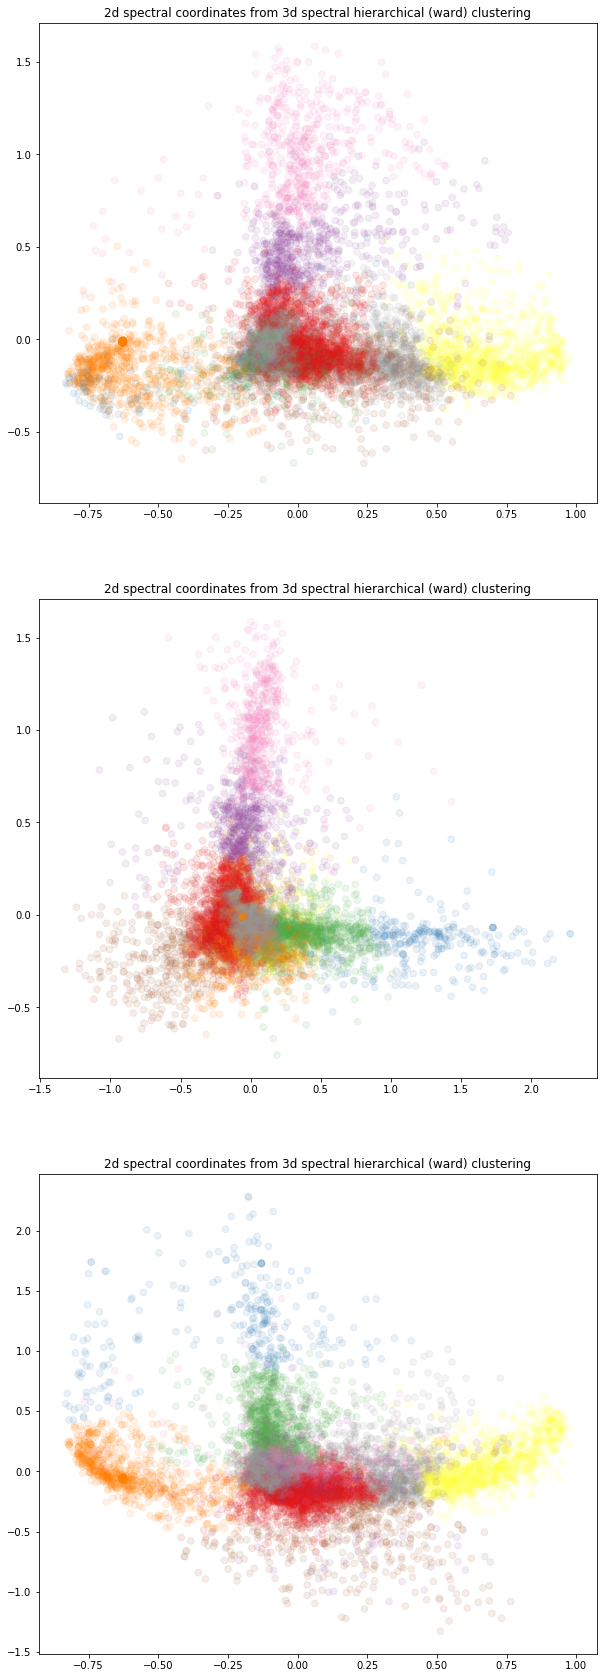

In [17]:
plt.figure(figsize=(10,30))
par_alf=0.1
plt.subplot(311)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(312)
plt.scatter(spect_emb_3[:,2],spect_emb_3[:,1], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(313)
plt.scatter(spect_emb_3[:,0],spect_emb_3[:,2], alpha=par_alf,s=45, c=clustering_3d_ward.labels_, cmap=plt.cm.Set1)
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

## DBScan clustering

In [21]:
dist_mat_3d=pairwise_distances(spect_emb_3)

In [22]:
dist_vec=dist_mat_3d.flatten()

In [ ]:
plt.figure(figsize=(16,9))
# plt.hist(n_grams_tfidf_dist_mat.flatten())
sns.distplot(dist_vec)
# sns.kdeplot()

In [ ]:
freq_dists=pd.crosstab(index=np.round_(dist_vec[dist_vec<0.25],3), columns="count")

col_0   count
row_0        
0.000   12205
0.001     646
0.002    1950
0.003    3592
0.004    4890
0.005    5922
0.006    6474
0.007    6980
0.008    7344
0.009    7668
0.010    8192
0.011    9040
0.012    9760
0.013   10574
0.014   11822
0.015   13520
0.016   14914
0.017   16714
0.018   18162
0.019   19862
0.020   21606
0.021   23640
0.022   25872
0.023   27656
0.024   29576
0.025   31112
0.026   33248
0.027   35238
0.028   37844
0.029   39496
...       ...
0.170  171616
0.171  170680
0.172  170974
0.173  170464
0.174  171342
0.175  172162
0.176  171560
0.177  170728
0.178  171400
0.179  169962
0.180  171888
0.181  169622
0.182  169888
0.183  169974
0.184  170564
0.185  170282
0.186  171606
0.187  170338
0.188  171208
0.189  169710
0.190  170298
0.191  169298
0.192  169772
0.193  169294
0.194  169412
0.195  169054
0.196  169328
0.197  169840
0.198  168354
0.199  168832

[200 rows x 1 columns]


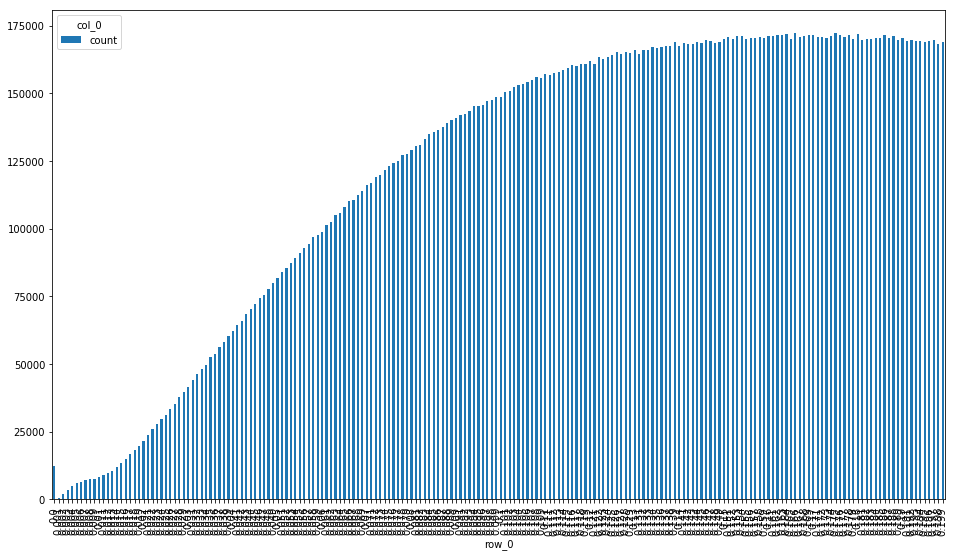

In [93]:
print(freq_dists.iloc[:200,:])#.iloc[:50,:])
freq_dists.iloc[:200,:].plot(kind="bar",figsize=(16,9))#.iloc[:150,:]
#0.168

In [94]:
db_scan = DBSCAN(eps=.081, min_samples=70).fit(spect_emb_3)#spect_emb_tfidf)
spect_db_labels = db_scan.labels_

In [95]:
pd.crosstab(index=spect_db_labels, columns="count")

col_0,count
row_0,
-1,4175
0,7316
1,159
2,365
3,70
4,56


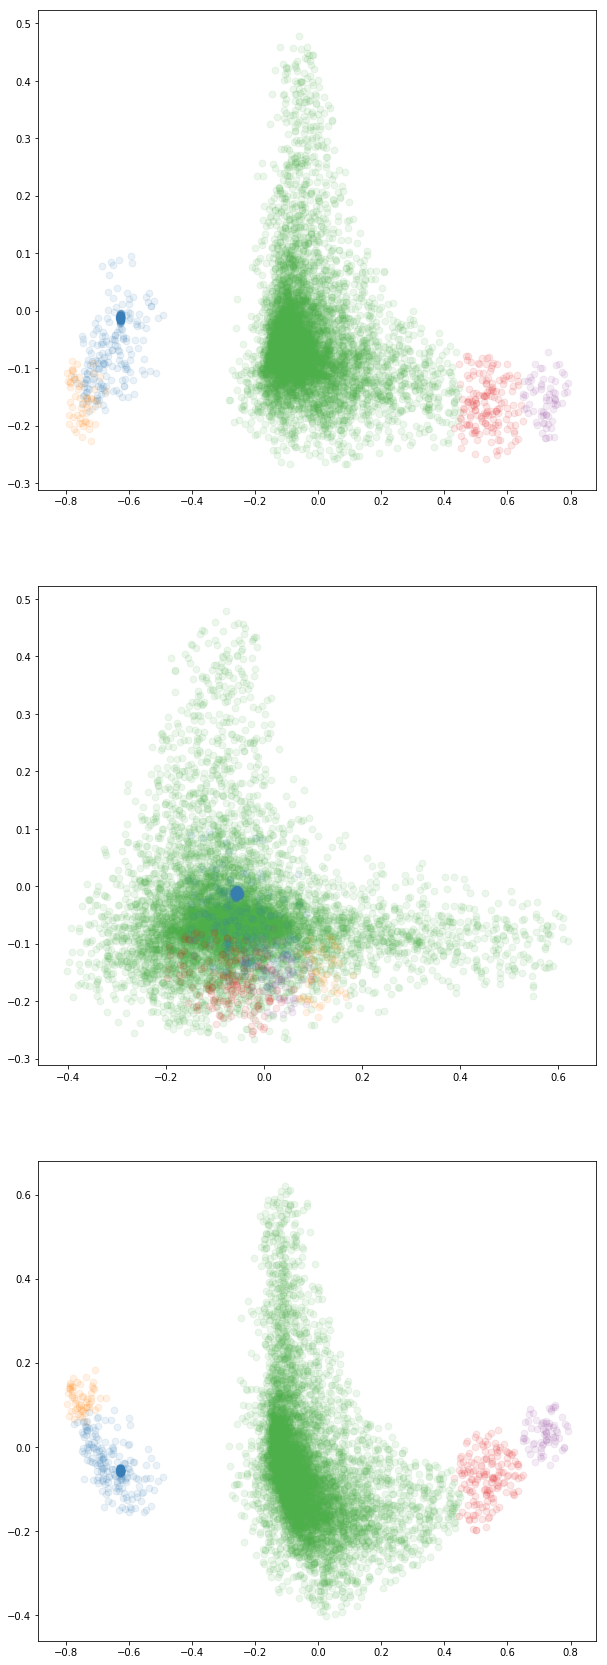

In [132]:
plt.figure(figsize=(10,30))
par_alf=.01#(spect_db_labels>-.5)*.1#0.1
plt.title("2d spectral coordinates from 3d spectral hierarchical (ward) clustering")

plt.subplot(311)
# plt.scatter(spect_emb_3[spect_db_labels==-1,0],spect_emb_3[spect_db_labels==-1,1], alpha=0.01,s=45, c="white", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==0,0],spect_emb_3[spect_db_labels==0,1], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==1,0],spect_emb_3[spect_db_labels==1,1], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==2,0],spect_emb_3[spect_db_labels==2,1], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==3,0],spect_emb_3[spect_db_labels==3,1], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==4,0],spect_emb_3[spect_db_labels==4,1], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)

plt.subplot(312)
# plt.scatter(spect_emb_3[spect_db_labels==-1,2],spect_emb_3[spect_db_labels==-1,1], alpha=0.01,s=45, c="white", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==0,2],spect_emb_3[spect_db_labels==0,1], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==1,2],spect_emb_3[spect_db_labels==1,1], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==2,2],spect_emb_3[spect_db_labels==2,1], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==3,2],spect_emb_3[spect_db_labels==3,1], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==4,2],spect_emb_3[spect_db_labels==4,1], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)

plt.subplot(313)
# plt.scatter(spect_emb_3[spect_db_labels==-1,0],spect_emb_3[spect_db_labels==-1,2], alpha=0.01,s=45, c="white", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==0,0],spect_emb_3[spect_db_labels==0,2], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==1,0],spect_emb_3[spect_db_labels==1,2], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==2,0],spect_emb_3[spect_db_labels==2,2], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==3,0],spect_emb_3[spect_db_labels==3,2], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
plt.scatter(spect_emb_3[spect_db_labels==4,0],spect_emb_3[spect_db_labels==4,2], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)


In [128]:
clustering_colors=matplotlib.colors.ListedColormap(["#4daf4a","#e41a1c","#377eb8","#984ea3","#ff7f00"])#'#d9d9d9','#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#a65628'])#

Making animation
Saving Movie File


MovieWriter imagemagick unavailable. Trying to use pillow instead.


Saving animated GIF File


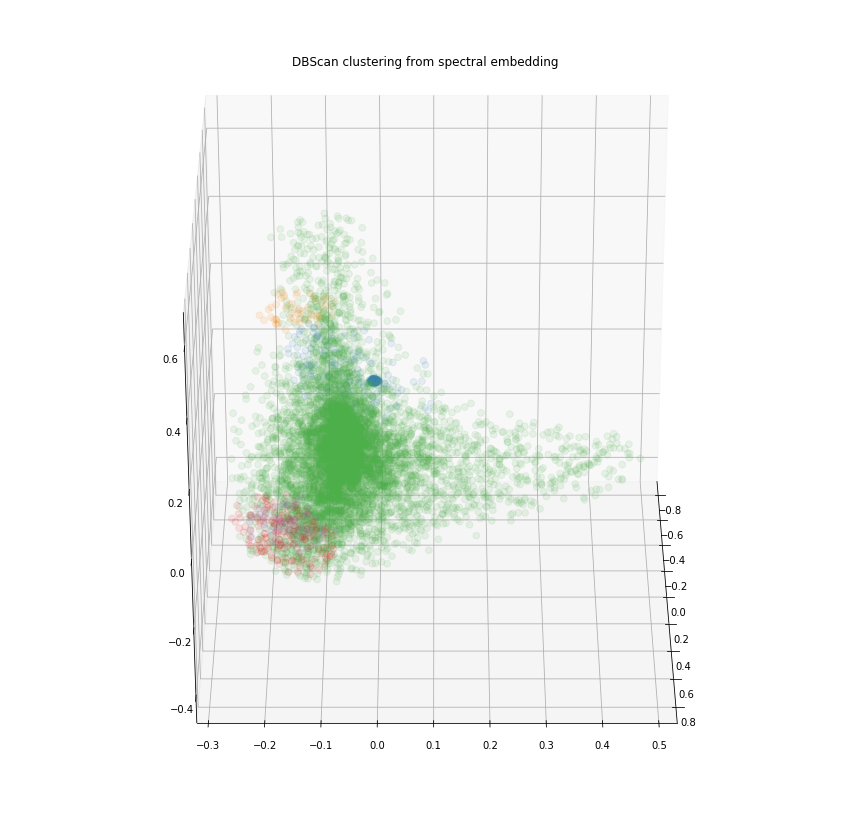

In [134]:
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(spect_emb_3[spect_db_labels==-1,0],spect_emb_3[spect_db_labels==-1,1],spect_emb_3[spect_db_labels==-1,2], alpha=0.01,s=45, c="white", cmap=plt.cm.Set1)
ax.scatter(spect_emb_3[spect_db_labels==0,0],spect_emb_3[spect_db_labels==0,1],spect_emb_3[spect_db_labels==0,2], alpha=.1,s=45, c="#4daf4a", cmap=plt.cm.Set1)
ax.scatter(spect_emb_3[spect_db_labels==1,0],spect_emb_3[spect_db_labels==1,1],spect_emb_3[spect_db_labels==1,2], alpha=.1,s=45, c="#e41a1c", cmap=plt.cm.Set1)
ax.scatter(spect_emb_3[spect_db_labels==2,0],spect_emb_3[spect_db_labels==2,1],spect_emb_3[spect_db_labels==2,2], alpha=.1,s=45, c="#377eb8", cmap=plt.cm.Set1)
ax.scatter(spect_emb_3[spect_db_labels==3,0],spect_emb_3[spect_db_labels==3,1],spect_emb_3[spect_db_labels==3,2], alpha=.1,s=45, c="#984ea3", cmap=plt.cm.Set1)
ax.scatter(spect_emb_3[spect_db_labels==4,0],spect_emb_3[spect_db_labels==4,1],spect_emb_3[spect_db_labels==4,2], alpha=.1,s=45, c="#ff7f00", cmap=plt.cm.Set1)

# ax.scatter(xs=spect_emb_3[:,0],
#            ys=spect_emb_3[:,1],
#            zs=spect_emb_3[:,2],
#            c=clustering_3d_ward.labels_, 
#            alpha=0.35,
#            cmap=clustering_colors)
plt.title("DBScan clustering from spectral embedding" )
# plt.axis('off') # remove axes for visual appeal

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
print("Saving Movie File")
rot_animation.save('cluster_anim_dbs.mp4', writer=writer)
print("Saving animated GIF File")
rot_animation.save('whljgr_clustering_dbs.gif', dpi=80, writer='imagemagick')

# Animate - Export 3d clusters

In [ ]:
# # Set up formatting for the movie files
# Writer = animation.writers['ffmpeg']
# writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# fig = plt.figure(figsize=(15,15))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=spect_emb_3[:,0],
#            ys=spect_emb_3[:,1],
#            zs=spect_emb_3[:,2],
#            c=clustering_3d_ward.labels_, 
#            alpha=0.35,
#            cmap=plt.cm.Set1)
# plt.title("Ward's hierarchical clustering from spectral embedding" )
# # plt.axis('off') # remove axes for visual appeal

# def rotate(angle):
#     ax.view_init(azim=angle)

# print("Making animation")
# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
# print("Saving Movie File")
# rot_animation.save('cluster_anim_2.mp4', writer=writer)
# print("Saving animated GIF File")
# rot_animation.save('whljgr_clustering_2.gif', dpi=80, writer='imagemagick')

In [ ]:
author_data["cluster"]=clustering_3d_ward.labels_
author_data["embd_x_coord"]=spect_emb_3[:,0]
author_data["embd_y_coord"]=spect_emb_3[:,1]
author_data["embd_z_coord"]=spect_emb_3[:,2]

In [ ]:
author_data.head(30)

In [ ]:
# author_data.to_csv("author_data_clusters_2.csv")

# Explore Clusters

In [ ]:
pd.crosstab(index=author_data.topic, columns=author_data.cluster)

In [ ]:
pd.crosstab(index=author_data.grupo_edad, columns=author_data.cluster)

In [ ]:
pd.crosstab(index=[author_data.topic,author_data.grupo_edad], columns=author_data.cluster)

In [ ]:
centroides_median=np.array([[np.median(author_data.loc[author_data.cluster==clst,"embd_x_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_y_coord"]),
                             np.median(author_data.loc[author_data.cluster==clst,"embd_z_coord"])]
 for clst in list(set(author_data.cluster))])

In [ ]:
enumerate(list(set(author_data.cluster)))

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=spect_emb_3[:,0],
           ys=spect_emb_3[:,1],
           zs=spect_emb_3[:,2],
           c=clustering_3d_ward.labels_, 
           alpha=0.05,
           cmap=plt.cm.Set1)

# ax.scatter(xs=centroides_median[:,0],
#            ys=centroides_median[:,1],
#            zs=centroides_median[:,2], 
#            s=500)

for i, txt in enumerate(list(set(author_data.cluster))):
    ax.text(centroides_median[i,0],
            centroides_median[i,1],
            centroides_median[i,2],
            '%s' % (str(txt)), size=20, zorder=1, color='k')

plt.title("Ward's hierarchical clustering from spectral embedding" )

# Wordclouds

In [ ]:
# tfidf_data=pd.read_csv("df_out.csv",header=0,index_col="id")
# del tfidf_data['Unnamed: 0']
# tfidf_data.sample(20)
# tfidf_data.shape

In [ ]:
author_tfidf=tfidf_data#pd.read_csv("usr_txt_ftr_3.csv",header=0,index_col="id")
# del author_tfidf['don']
# del author_tfidf['just']
print(author_tfidf.shape)
author_tfidf.sample(20)

In [ ]:
# author_data=pd.read_csv("author_data_clusters_2.csv",header=0,index_col="id")
# print(author_data.shape)
author_data.sample(20)

In [ ]:
clrs_wrdcld=matplotlib.colors.LinearSegmentedColormap.from_list("", [#'#a50026',
                                                                     '#d73027',
                                                                     '#f46d43',
                                                                     '#fdae61',
#                                                                      '#fee090',
#                                                                      '#ffffbf',
#                                                                      '#e0f3f8',
#                                                                      '#abd9e9',
                                                                     '#74add1',
                                                                     '#4575b4',
                                                                     '#313695'])

In [ ]:
pic_wide=900
def wrd_cld_dic_clust(clust_labels,clust_id,top_n=300):
    txt_freqs= author_tfidf[clust_labels==clust_id].sum(axis=0)
    indices = np.argsort(txt_freqs)[::-1]
    features =list(author_tfidf.columns)
    top_features = [[features[i],txt_freqs[i]] for i in indices[:top_n]]
    fr_dic={ str(features[i]).upper():txt_freqs[i] for i in indices[:top_n]}
    wc = WordCloud(width=pic_wide,  height=int(pic_wide*(9/21)), 
               background_color=None, mode="RGBA",min_font_size=8,
               colormap=clrs_wrdcld)#Dark2_r)#Paired_r)#tab10_r)#Set1_r) #
    wc.generate_from_frequencies(fr_dic)
    return wc

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,0,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,1,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,2,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,3,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,4,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,5,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,6,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,7,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,8,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')

In [ ]:
plt.figure(figsize=(16,9))
plt.imshow(wrd_cld_dic_clust(author_data.cluster,9,200), interpolation='bilinear')
plt.axis("off")
#plt.savefig('wrdcld_1.png')